In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

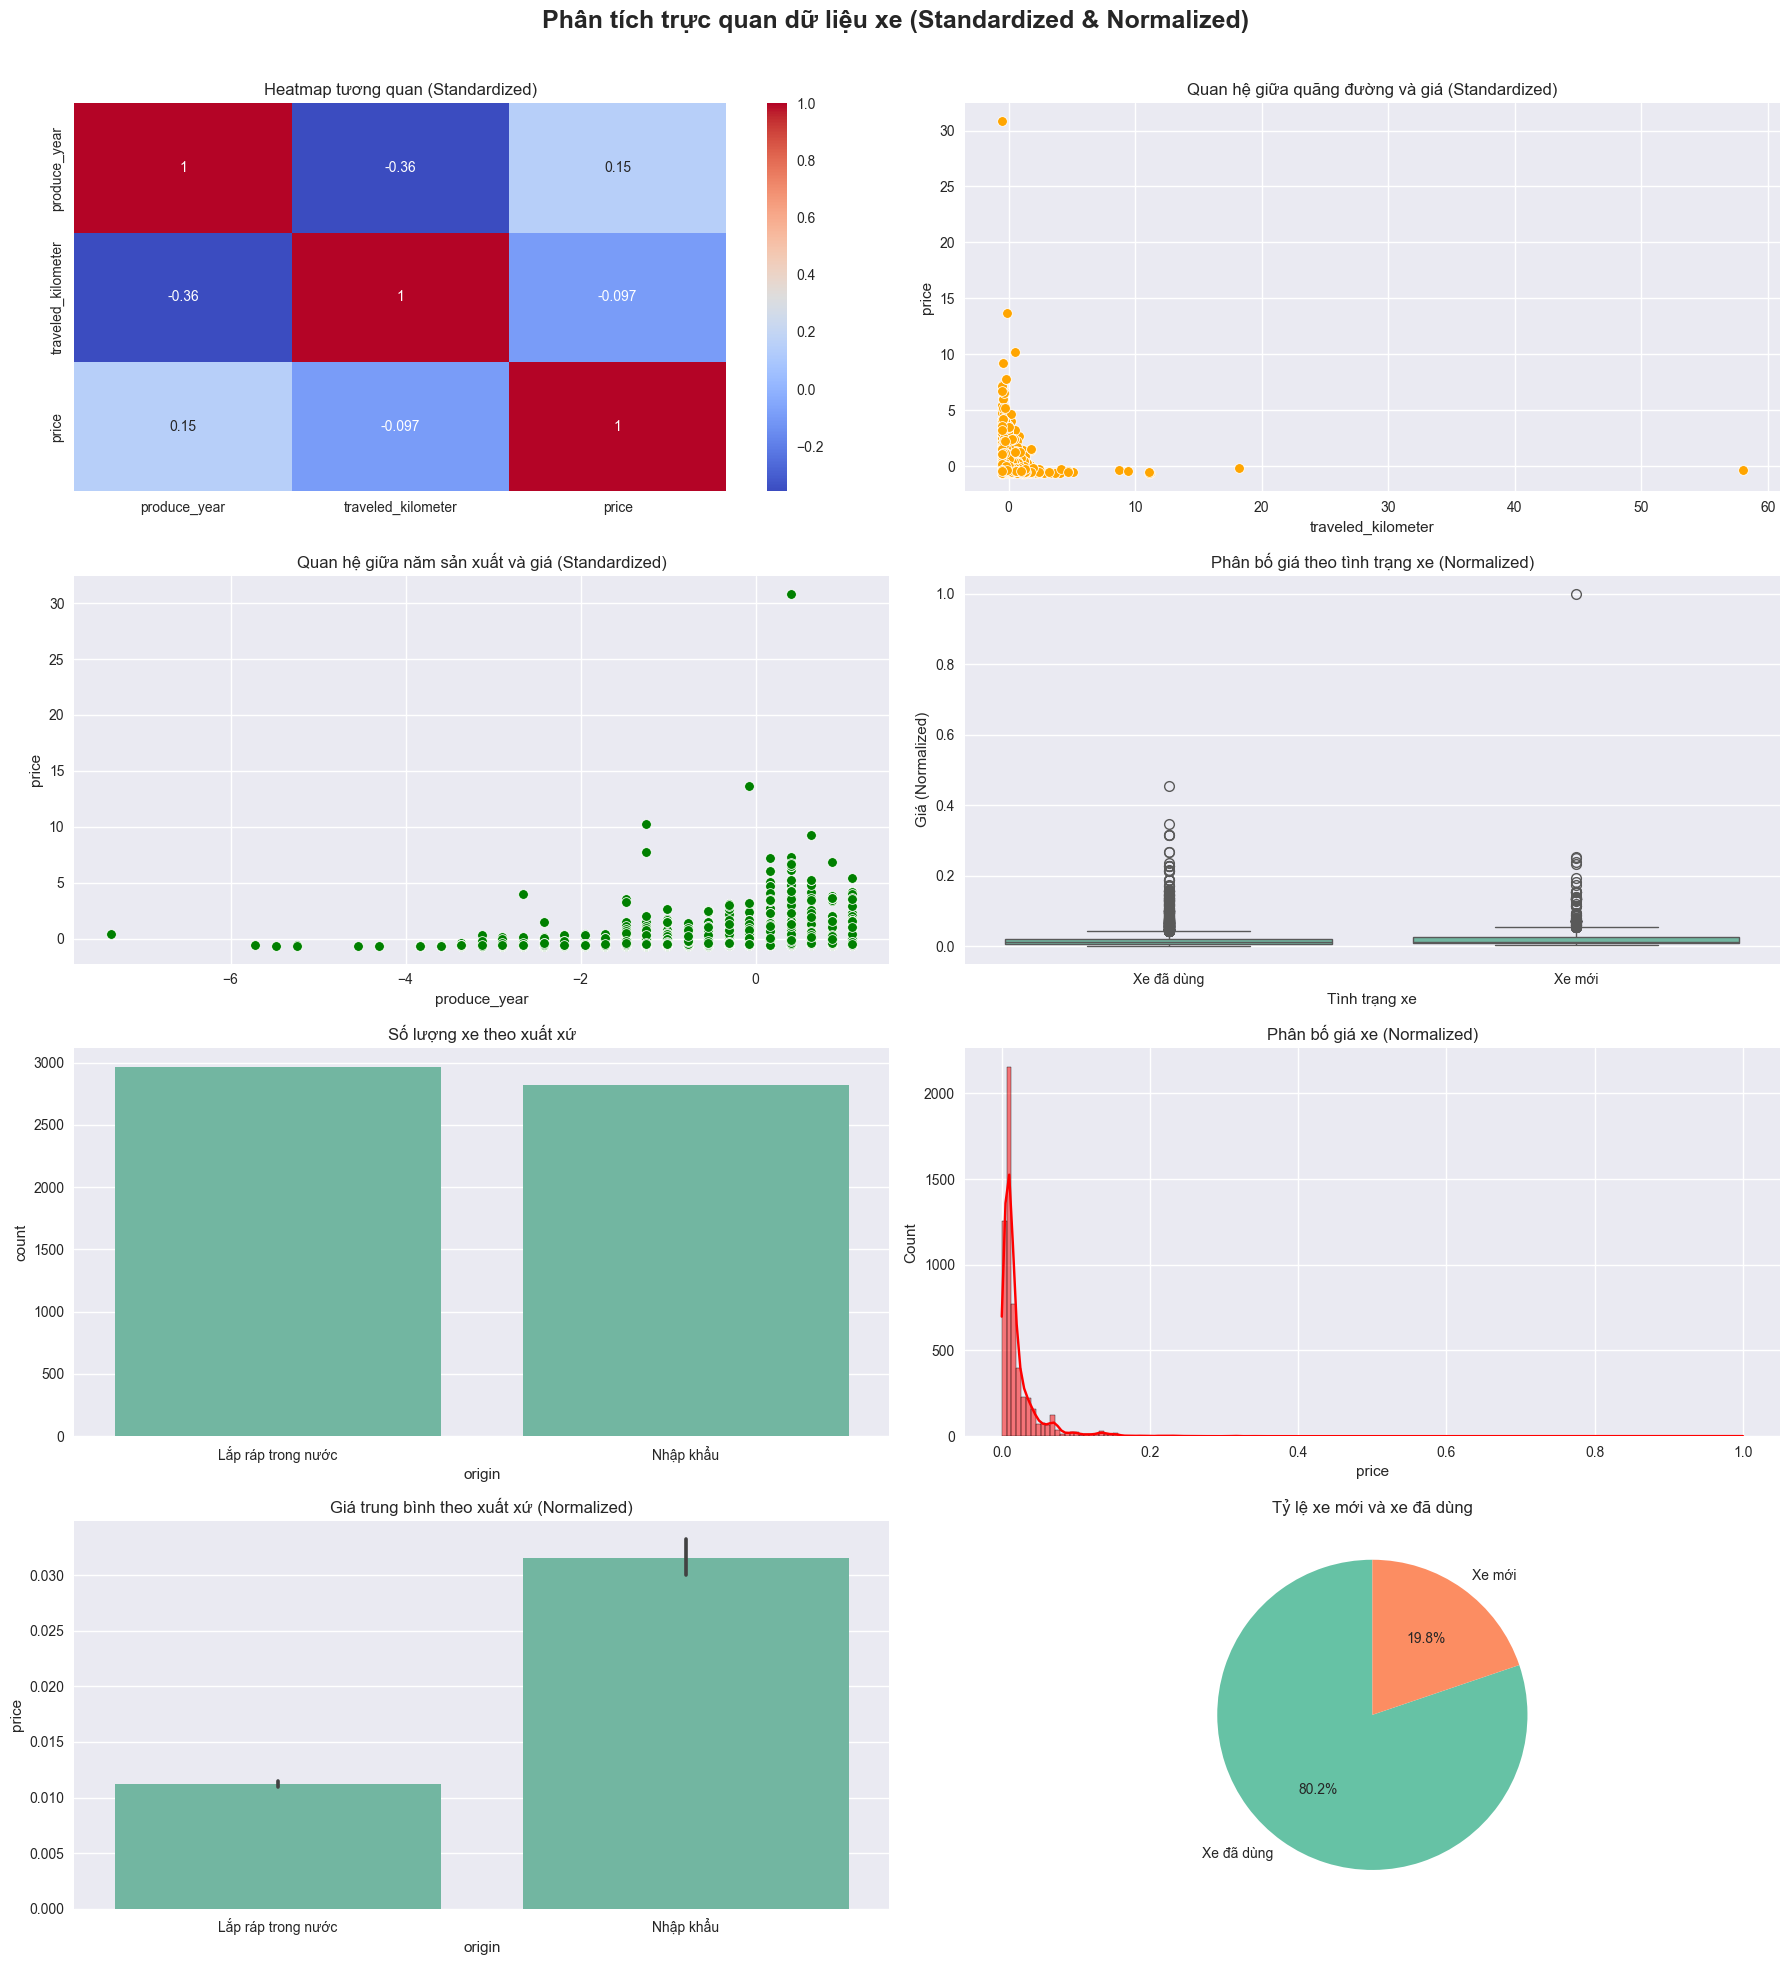

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# Lấy dữ liệu cần thiết
df_std = standardize_df.copy() # type: ignore
df_norm = normalize_df.copy() # type: ignore

# Tạo figure lớn
fig, axes = plt.subplots(4, 2, figsize=(18, 20))
fig.suptitle("Phân tích trực quan dữ liệu xe (Standardized & Normalized)", fontsize=18, fontweight='bold')

# 1. Heatmap tương quan
sns.heatmap(df_std[["produce_year", "traveled_kilometer", "price"]].corr(), annot=True, cmap="coolwarm", ax=axes[0,0])
axes[0,0].set_title("Heatmap tương quan (Standardized)")

# 2. Scatter plot: quãng đường ↔ giá
sns.scatterplot(data=df_std, x="traveled_kilometer", y="price", ax=axes[0,1], color='orange')
axes[0,1].set_title("Quan hệ giữa quãng đường và giá (Standardized)")

# 3. Scatter plot: năm sản xuất ↔ giá
sns.scatterplot(data=df_std, x="produce_year", y="price", ax=axes[1,0], color='green')
axes[1,0].set_title("Quan hệ giữa năm sản xuất và giá (Standardized)")

# 4. Boxplot: giá theo tình trạng xe
sns.boxplot(data=df_norm, x="current_status", y="price", ax=axes[1,1])
axes[1,1].set_title("Phân bố giá theo tình trạng xe (Normalized)")
axes[1,1].set_xlabel("Tình trạng xe")
axes[1,1].set_ylabel("Giá (Normalized)")

# 5. Countplot: thống kê xuất xứ xe
sns.countplot(data=df_norm, x="origin", ax=axes[2,0])
axes[2,0].set_title("Số lượng xe theo xuất xứ")

# 6. Histogram: phân bố giá (Normalized)
sns.histplot(df_norm["price"], kde=True, ax=axes[2,1], color='red')
axes[2,1].set_title("Phân bố giá xe (Normalized)")

# 7. Bar chart: giá trung bình theo xuất xứ
sns.barplot(data=df_norm, x="origin", y="price", ax=axes[3,0])
axes[3,0].set_title("Giá trung bình theo xuất xứ (Normalized)")

# 8. Pie chart: tỷ lệ xe mới và đã dùng
status_counts = df_norm["current_status"].value_counts()
axes[3,1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
axes[3,1].set_title("Tỷ lệ xe mới và xe đã dùng")

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()
